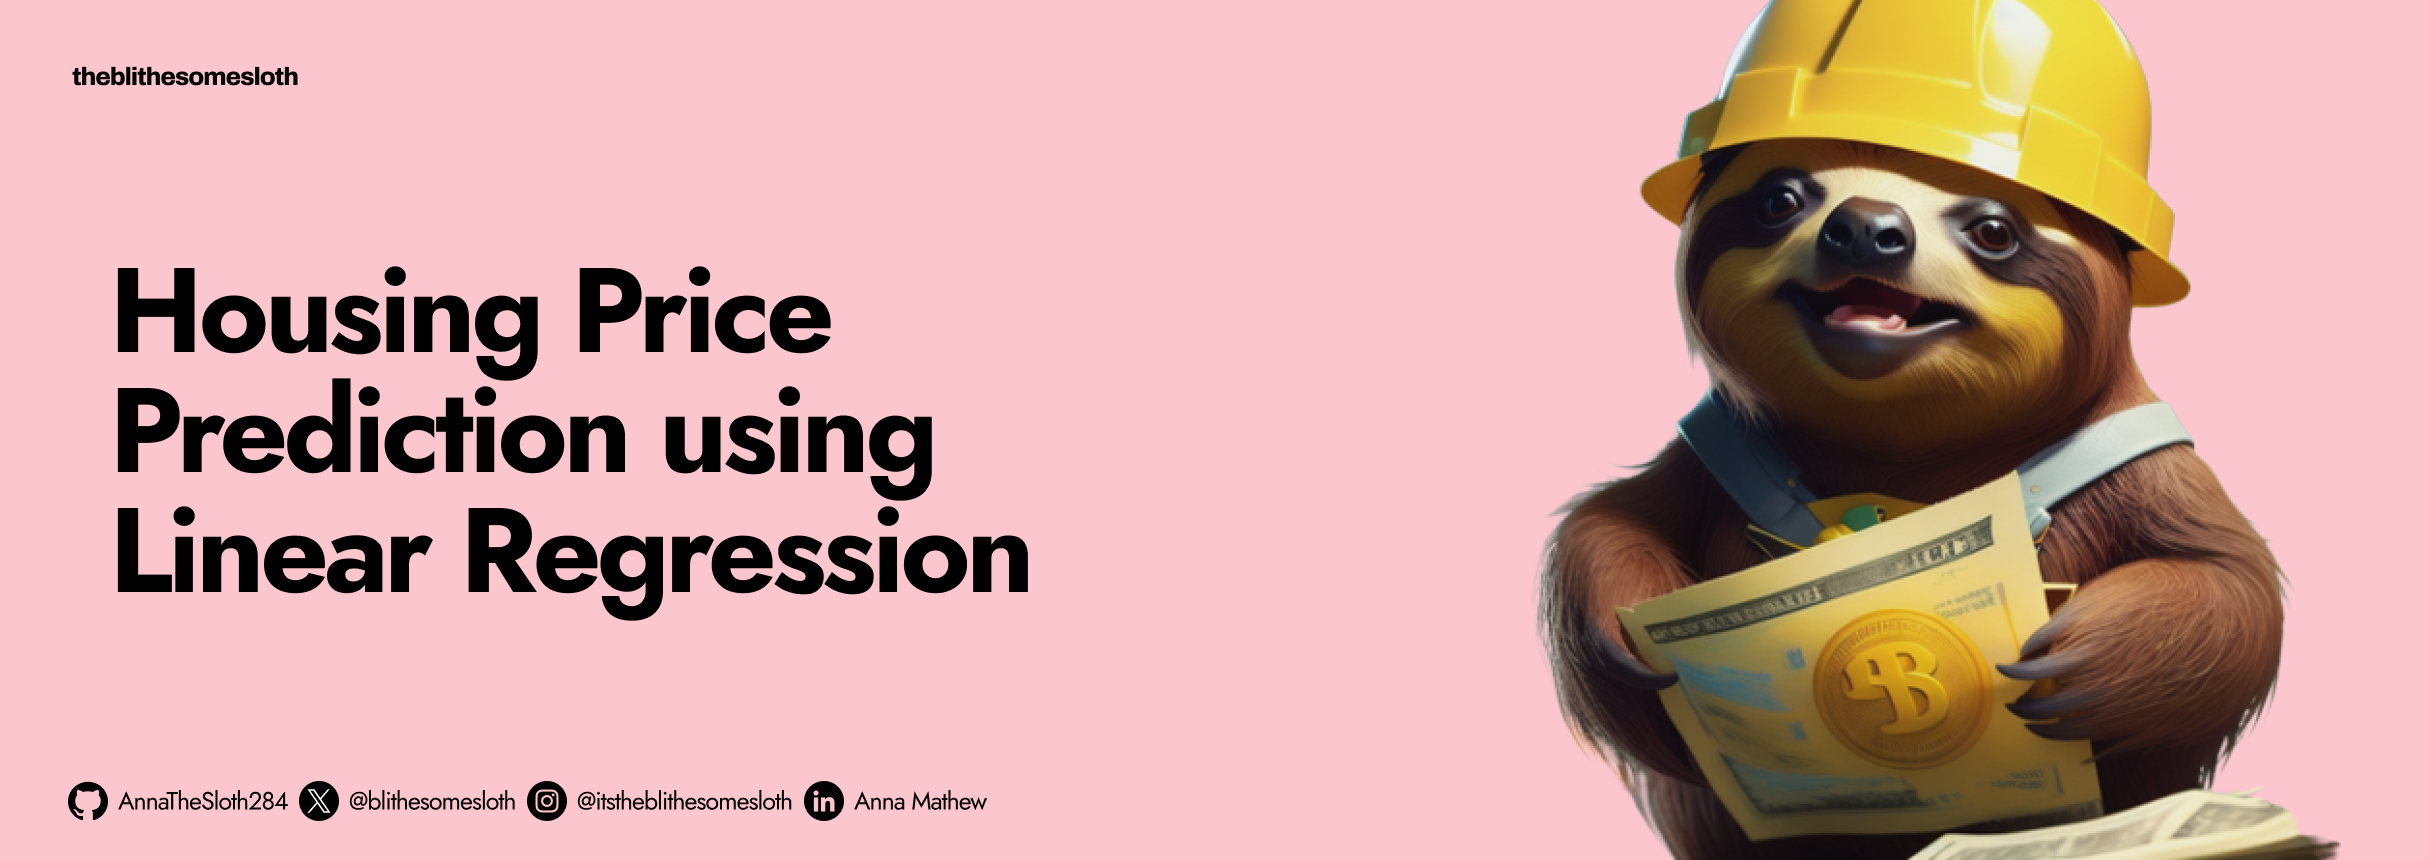
</br></br>
Imagine that you are trying to predict how much rain will fall in a particular city tomorrow. You have a data set of historical data that shows how much rain has fallen in the city on each day for the past few years.

Here is where *linear regression* comes into play. You can use linear regression to train a model that can predict how much rain will fall in the city tomorrow based on the historical data. The model will learn the relationship between the historical data and the amount of rain that fell by minimizing the error between the predicted values and the actual values.

Once the model is trained, you can use it to predict how much rain will fall in the city tomorrow. For example, if the model predicts that there is a 60% chance of rain, you can bring an umbrella with you tomorrow.


## What is Linear Regression
**Linear regression** is a powerful tool that can be used to predict a variety of things, even if we don't fully understand the underlying relationship between the features and the target variable. It is a statistical method that **uses a straight line to model the relationship between two variables**. The variable that we want to predict is called the *dependent variable*, and the variables that we use to predict the dependent variable are called the *independent variables.*

The mathematical equation for linear regression is as follows:

```
y = mx + b
```

where:

* `y` is the dependent variable
* `m` is the slope of the line
* `x` is the independent variable
* `b` is the y-intercept

The slope of the line tells us how much the dependent variable changes for every unit change in the independent variable. The y-intercept tells us the value of the dependent variable when the independent variable is zero.

The logic behind linear regression is to find the values of `m` and `b` that minimize the error between the predicted values and the actual values. This is done using a process called gradient descent.

Once the values of `m` and `b` have been found, we can use the linear regression model to predict the value of the dependent variable for new data.

## Importing libraries
First we import the libraries that will provide a set of tools for loading, preparing, visualizing, and evaluating data. To be specific:


*   **numpy :** Used for scientific computing with Python and working with multi-dimensional arrays.</br></br>
*   **pandas :** Used for data analysis and manipulation with Python.</br></br>
*   **matplotlib :** Used for plotting graphs and figures with Python.</br></br>
*   **seaborn :** It builds on top of Matplotlib to provide a more user-friendly interface for creating statistical plots.</br></br>
*   **sklearn :** The Scikit-learn library provides a wide range of machine learning algorithms. From this library we will be requiring the following modules:</br></br>
    *   **sklearn.model_selection :**  For splitting data into training and test sets, and evaluating machine learning models.</br></br>
    *   **sklearn.preprocessing :** For preparing data by scaling data, imputing missing values, and converting categorical data to numerical data.</br></br>
    *   **sklearn.linear_model :** Provides implementations of various linear regression models.</br></br>
    *   **sklearn.metrics :** For evaluating machine learning models by calculating accuracy, precision, recall, and other metrics.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'''For splitting data into training and test sets'''
from sklearn.model_selection import train_test_split

'''The MinMaxScaler class scales the data by transforming each feature to a range of [0, 1]
because machine learning models are more sensitive to features that have a large scale. '''
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

'''For measuring the proportion of variance in the target variable that can be explained by the model.'''
from sklearn.metrics import r2_score

## Importing Data
First we load the data into a Pandas DataFrame named *data*. *data* is a data structure that can be used to store and organize data in a table-like format.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/intro_to_ml/Housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding Data

Before we do apply machine learning to our dataset, we do basic EDA on the data so as to:</br></br>

*   **To identify and address any data quality issues.** This includes checking for missing values, outliers, and invalid data.</br></br>
*   **To understand the distribution of the data.** This helps us to choose the right type of linear regression model and to set the hyperparameters of the model.</br></br>
*   **To identify the relationships between the features and the target variable.** This helps us to select the most important features for the model and to improve the performance of the model.

In [ ]:
# Returns the first 10 rows of the DataFrame.
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
# Returns the last 10 rows of the DataFrame.
data.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
# Returns a tuple of the number of rows and columns in the DataFrame.
data.shape

(545, 13)

In [ ]:
''' Returns information about the DataFrame, including the data types of each column,
the number of non-null values in each column, and the memory usage of the DataFrame.'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Returns a list of the column names in the DataFrame.
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
'''Returns a summary of the numerical features in the DataFrame, including
the count, mean, standard deviation, minimum, maximum, and quartiles.'''
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Returns the number of missing values in each column of the DataFrame.
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Cleaning and Preparing Data

### Converting Categorical Data into Numerical Data

Linear regression models can only work with numerical data, so we need to convert binary categorical data into 0 and 1 before using it as input. A binary categorical variable is a variable that can take on only two values, such as "yes" or "no", "true" or "false", or "male" or "female".
</br></br>One-hot encoding is a technique that creates a new column for each possible value of the categorical variable, with a binary value indicating whether the observation belongs to that category. This makes the data more compatible with the model, can improve performance, and makes it easier to interpret.

In [ ]:
categorical_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
data[categorical_col]

In [ ]:
def binary_map(x):
  return x.map({'yes':1, 'no':0})

In [ ]:
data[categorical_col] = data[categorical_col].apply(binary_map)
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


You might have realised how we did not consider the *'furnishingstatus'* feature of our dataset earlier. This is because the column is **not a binary categorical data** unlike our previous case at it has three different values: *'furnished'*, *'semi-furnished'* and *'unfurnished'*.
</br></br>Therefore, when we use one-hot encoding on a categorical variable with three or more possible values, for this case in particular, we shall create three new columns, each of which contains a binary value indicating whether the observation belongs to that category. We then drop one of the columns, typically the one with the most observations, to avoid the *dummy variable trap** and *multicollinearity***. This leaves us with two dummy variables that capture the presence or absence of the other two categories relative to the baseline category.
</br></br>

*   ***Dummy variable trap** *is when we include all dummy variables for a categorical variable in a machine learning model, which can lead to overfitting.*
*   ****Multicollinearity** *is when two or more features in a machine learning model are highly correlated, which can lead to inaccurate predictions.*



In [ ]:
dummy_col = pd.get_dummies(data['furnishingstatus'])
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
dummy_col = pd.get_dummies(data['furnishingstatus'], drop_first=True)
dummy_col.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


The above line drops the *'furnishingstatus'* column from the data DataFrame. The `axis=1` argument specifies that we want to drop a column, and the `inplace=True` argument specifies that we want to make the changes to the original DataFrame.

In [ ]:
data = pd.concat([data, dummy_col],axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


Here, `axis=1` means that we are concatenating the two DataFrames **column-wise**.

In [ ]:
data.drop(['furnishingstatus'],axis=1,inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
np.random.seed(0)


The above line sets the random seed for the NumPy random number generator. This means that NumPy will use the same sequence of random numbers every time we run our code. This is useful for ensuring that the results of our machine learning experiments are reproducible.
</br></br>
In other words, if we set the random seed to 0 and run our code twice, we will get the same results both times. This can be useful for debugging and testing our machine learning models.
</br></br>
Here, seed() sets the starting point for generating random numbers, ensuring reproducibility of results.

### Split the data into training and test sets
This is done to prevent the model from overfitting to the training data. The training data is used to train the model, and the test data is used to evaluate the model's performance on unseen data.

In [ ]:
df_train, df_test = train_test_split(data, train_size=0.7,test_size=0.3,random_state=100)

The above line splits the data `DataFrame` into two DataFrames, df_train and df_test, containing 70% and 30% of the data, respectively. The `random_state` argument specifies a random seed, which ensures that the data is split in the same way every time we run the code.

This is a common step in machine learning, as it allows us to train our model on a subset of the data (the training set) and evaluate its performance on a held-out subset of the data (the test set). This helps us to avoid overfitting, which is when the model learns the training data too well and performs poorly on new data.

Here is a more detailed explanation of each argument in the train_test_split() function:

*  `data`: The DataFrame that we want to split.
*  `train_size`: The proportion of the data that we want to include in the training set.
*  `test_size`: The proportion of the data that we want to include in the test set.
*  `random_state`: A random seed.

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [ ]:
df_train.shape

(381, 14)

In [ ]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [ ]:
df_test.shape

(164, 14)

### Scale the data
This is done to normalize the data so that all features have the same scale. This helps the model to learn more effectively. In our case, we do this using a MinMaxScaler.

In [ ]:
scaler = MinMaxScaler()

The above line creates a `MinMaxScaler()` object. The MinMaxScaler is a machine learning preprocessing algorithm that transforms the features of a data set to a range of values between 0 and 1. This is useful for machine learning algorithms that are sensitive to the scale of the features, such as linear regression and logistic regression.

The `MinMaxScaler` works by subtracting the minimum value of each feature from all of the values in the feature and then dividing by the range of the feature. This ensures that all of the features are scaled to the same range, regardless of their original scale.


`MinMaxScaler` works as follows:

*   For each feature, the MinMaxScaler calculates the minimum and maximum values of the feature.
*   For each value in the feature, the MinMaxScaler subtracts the minimum value of the feature and then divides by the range of the feature.
*   This results in a new value for each feature, which is scaled to the range of 0 to 1.


In [ ]:
col_to_scale = ['area','bedrooms','bathrooms','stories','parking','price']
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [ ]:
y_train = df_train.pop('price')
x_train = df_train
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

The code splits the data into two parts:
*   the **target variable** is the value that we want to predict, and
*   the **features** are the inputs that we use to predict the target variable.

`y_train = df_train.pop('price')` extracts the target variable from the data set and stores it in the `y_train`.

`x_train = df_train` extracts the features from the data set and stores them in the `x_train`.

`y_train.head()` prints the first few rows of the y_train DataFrame.

## Building the Model

In [ ]:
linear_regression = LinearRegression()

The above line of code creates a linear regression model. A linear regression model is a machine learning model that learns a linear relationship between the target variable and the features.

In [ ]:
linear_regression.fit(x_train,y_train)

LinearRegression()

The code `linear_regression.fit(x_train, y_train)` trains the linear regression model on the training data. The training data consists of the features (`x_train`) and the target variable (`y_train`).

The model learns the relationship between the features and the target variable by minimizing the error between the predicted values and the actual values.

Once the model is trained, it can be used to predict the target variable for new data.

Here is a brief explanation of the code for non-ML coders:

* `linear_regression`: This is the linear regression model that we created.
* `fit`: This is the method that trains the model on the training data.
* `x_train`: This is a list of the features for the training data.
* `y_train`: This is a list of the target variable values for the training data.

In other words, the code `linear_regression.fit(x_train, y_train)` tells the model to learn the relationship between the features and the target variable by looking at the training data.

In [ ]:
coefficient = linear_regression.coef_
print(coefficient)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


The above line of code prints the **coefficients** of the linear regression model. These **coefficients** are the slopes of the lines that the model learns.

* `coefficient`: This is a variable that will store the coefficients of the model.
* `linear_regression`: This is the linear regression model that we created.
* `coef_`: This is the attribute of the model that stores the coefficients.

In other words, the code `coefficient = linear_regression.coef_` tells the model to store the coefficients in the variable `coefficient`.

The coefficients are a measure of how much each feature affects the target variable. For example, if the coefficient for the square footage feature is 10, then every additional square foot of a house increases the price of the house by $10,000.

The `coefficients` can be used to understand the relationship between the features and the target variable. They can also be used to make predictions about new data.

In [ ]:
score = linear_regression.score(x_train, y_train)
print(score)

0.6814893088451202


The above line of code calculates the R-squared score of the linear regression model on the training data. R-squared is a measure of how well the model fits the training data.

* `score`: This is a variable that will store the R-squared score of the model.
* `linear_regression`: This is the linear regression model that we created.
* `score`: This is the method that calculates the R-squared score of the model on the training data.

In other words, the code tells the model to calculate the R-squared score on the training data and store it in the variable `score`.

The R-squared score, also known as the coefficient of determination, is a statistical measure of how well a regression model fits the training data. It is calculated as the proportion of the variance in the target variable that is explained by the model.

The mathematical equation for the R-squared score is as follows:

```
R-squared = 1 - (SS_res / SS_tot)
```

where:

* `SS_res` is the sum of squared residuals, which is the sum of the squared differences between the predicted values and the actual values.
* `SS_tot` is the total sum of squares, which is the sum of the squared differences between the mean of the target variable and the actual values.

The R-squared score ranges from 0 to 1, with a higher score indicating a better fit. A score of 1 indicates that the model perfectly fits the training data, while a score of 0 indicates that the model does not fit the training data at all.

The logic behind the R-squared score is as follows:

* The total sum of squares (SS_tot) represents the total variation in the target variable.
* The residual sum of squares (SS_res) represents the variation in the target variable that is not explained by the model.
* The R-squared score is calculated by subtracting the residual sum of squares from the total sum of squares and dividing by the total sum of squares.

Therefore, the R-squared score represents the proportion of the variation in the target variable that is explained by the model.

The R-squared score is a useful metric for evaluating the performance of a regression model. However, it is important to note that it is not a perfect measure. For example, it is possible to overfit a model to the training data, which can result in a high R-squared score but poor performance on new data.

</br></br>
*Here is an analogy:*

*Imagine that you are trying to fit a line to a set of data points. The R-squared score is a measure of how well the line fits the data points. A higher score indicates that the line fits the data points more closely.*

*The R-squared score can be used to evaluate the fit of the line and to compare different lines. For example, if you have two lines that fit the data points equally well, you can use the R-squared score to choose the simpler line.*



## Testing and Evaluating Model
*  **Make predictions on the test data:** This is done by calling the predict() method on the LinearRegression model and passing in the test data.

*  **Evaluate the model's performance using the r2_score metric:** The r2_score metric measures the proportion of variance in the target variable that can be explained by the model. A higher r2_score indicates that the model is better at explaining the target variable.

In [ ]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [ ]:
col_to_scale = ['area','bedrooms','bathrooms','stories','parking','price']
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


The above line of code creates a list of the columns that need to be scaled.

The code `df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])` scales the columns in the `col_to_scale` list using the `scaler` object.

The code `df_test.head()` prints the first few rows of the `df_test` DataFrame.

Here is a brief explanation of the code for non-ML coders:

* `col_to_scale`: This is a list of the columns that need to be scaled.
* `df_test[col_to_scale]`: This is a subset of the `df_test` DataFrame that contains only the columns in the `col_to_scale` list.
* `scaler`: This is a scaling object that was created in a previous step.
* `fit_transform`: This is a method on the `scaler` object that scales the data.
* `df_test.head()`: This is a method on the `df_test` DataFrame that prints the first few rows of the DataFrame.

Scaling is a common preprocessing step in machine learning. It helps to improve the performance of machine learning algorithms and makes the results of the algorithms more interpretable.

In [ ]:
y_test = df_test.pop('price')
x_test = df_test
prediction = linear_regression.predict(x_test)

The above code first removes the `price` column from the `df_test` DataFrame and stores it in the `y_test` variable and then makes predictions for the `price` column using the `x_test` DataFrame and the `linear_regression` model.

The `.predict()` method takes a DataFrame of features as input and returns a DataFrame of predictions for the target variable as output. The predictions are made by using the linear regression model that was trained on the training data.

The `.predict()` method in linear regression uses the following mathematical equation to make predictions:

```
y_hat = mx + b
```

where:

* `y_hat` is the predicted value of the target variable
* `m` is the slope of the linear regression model
* `x` is the input feature vector
* `b` is the y-intercept of the linear regression model

The slope and y-intercept of the linear regression model are learned from the training data using a process called gradient descent.

Once the slope and y-intercept have been learned, the model can be used to make predictions for new data by simply substituting the values of the features into the equation above.

In [ ]:
# Checking R squared value
# Calculate the coefficient of determination (R²) for the predictions
r2 = r2_score(y_test, prediction)

As mentioned earlier, the R squared score (R-squared) is a statistical measure of how well a regression model fits the data. It is calculated as the proportion of the variance in the target variable that is explained by the model.

The mathematical equation for the R-squared score is as follows:

```
R-squared = 1 - (SS_res / SS_tot)
```

where:

* `SS_res` is the sum of squared residuals, which is the sum of the squared differences between the predicted values and the actual values.
* `SS_tot` is the total sum of squares, which is the sum of the squared differences between the mean of the target variable and the actual values.

The R-squared score ranges from 0 to 1, with a higher score indicating a better fit. A score of 1 indicates that the model perfectly fits the data, while a score of 0 indicates that the model does not fit the data at all.

The R-squared score is a useful metric for evaluating the performance of a regression model. However, it is important to note that it is not a perfect measure. For example, it is possible to overfit a model to the training data, which can result in a high R-squared score but poor performance on new data.

In [ ]:
# Get the shape of y_test
y_test.shape

# Reshape y_test to a matrix with a single column
y_test_matrix = y_test.values.reshape(-1, 1)

In [ ]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

The above code creates a new Pandas DataFrame called `data_frame` with two columns: `actual` and `predicted`. The `actual` column contains the actual values of the target variable, and the `predicted` column contains the predicted values of the target variable.

The `flatten()` method converts the `y_test_matrix` and `prediction` arrays into one-dimensional arrays. This is necessary because the Pandas DataFrame constructor only accepts two-dimensional arrays as input.

Here is a breakdown of the code:

* `pd.DataFrame()`: This is the Pandas DataFrame constructor. It takes a dictionary as input and creates a new DataFrame from the dictionary.
* `{'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()}`: This is a dictionary with two keys: `actual` and `predicted`. The `actual` value is the flattened `y_test_matrix` array, and the `predicted` value is the flattened `prediction` array.
* `data_frame`: This is the new Pandas DataFrame that is created by the constructor. It has two columns: `actual` and `predicted`.

The `data_frame` DataFrame can be used to compare the actual and predicted values of the target variable. It can also be used to visualize the relationship between the actual and predicted values.

In [ ]:
# Display the first 10 rows of the DataFrame
data_frame.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


In [ ]:
data_frame.shape

(164, 2)

### Representing data inferences on plots
We know that a histogram is a graphical representation of the distribution of a set of data that shows how many data points fall within each range of values. The code `fig = plt.figure()` creates a new figure in Matplotlib.

The below code creates a scatter plot of the actual values of the target variable (`y_test`) against the predicted values of the target variable (`prediction`).

The code `plt.title('Actual vs Prediction')` sets the title of the plot to "Actual vs Prediction".

The code `plt.xlabel('Actual', fontsize=15)` sets the label for the x-axis to "Actual" with a font size of 15.

The code `plt.ylabel('Predicted', fontsize=15)` sets the label for the y-axis to "Predicted" with a font size of 15.

The scatter plot can be used to visualize the relationship between the actual and predicted values of the target variable. It can also be used to identify any outliers in the data.

Here is a brief explanation of how to interpret the scatter plot:

* If the points are evenly distributed around the 45-degree line, then the model is making accurate predictions.
* If the points are scattered above the 45-degree line, then the model is overestimating the target variable.
* If the points are scattered below the 45-degree line, then the model is underestimating the target variable.
* If there are any outliers in the data, they will be visible as points that are far away from the 45-degree line.

The scatter plot can be a useful tool for evaluating the performance of a machine learning model. It can also be used to identify areas where the model can be improved.

Text(0, 0.5, 'Predicted')

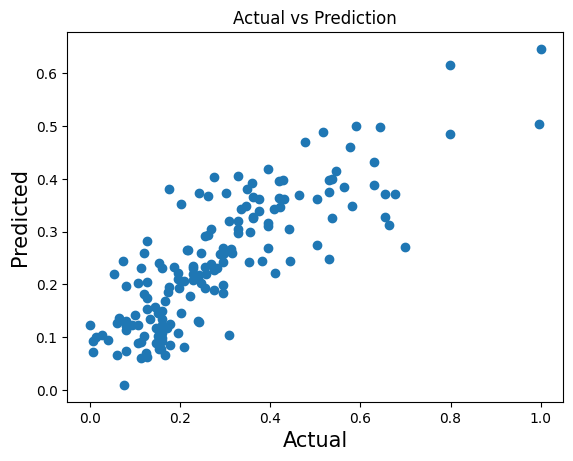

In [ ]:
# Create a new figure
fig = plt.figure()

# Scatter plot of actual versus predicted values
plt.scatter(y_test, prediction)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

In [ ]:
m, b = np.polyfit(y_test, prediction, 1)

The above code uses the `np.polyfit()` function to fit a linear regression model to the data in the `y_test` and `prediction` arrays.

The `np.polyfit()` function takes three arguments:

* `x`: The first argument is the independent variable.
* `y`: The second argument is the dependent variable.
* `deg`: The third argument is the degree of the polynomial to fit.

In this case, we are fitting a linear regression model, so the degree of the polynomial is 1.

The `np.polyfit()` function returns a tuple containing the coefficients of the polynomial. The first coefficient is the slope of the line, and the second coefficient is the y-intercept.

The following is a breakdown of the code:

* `np.polyfit()`: This is the NumPy `polyfit()` function. It fits a polynomial to the data in the `x` and `y` arrays and returns a tuple containing the coefficients of the polynomial.
* `y_test`: This is the independent variable.
* `prediction`: This is the dependent variable.
* `1`: This is the degree of the polynomial to fit.
* `m`: This is the slope of the line.
* `b`: This is the y-intercept of the line.

The `m` and `b` variables can be used to make predictions for new data. For example, to predict the value of the `prediction` variable for a new value of the `y_test` variable, we can use the following equation:

```
prediction = m * y_test + b
```

It is important to note that the predictions made by the model are only as good as the training data that the model was trained on. If the training data is noisy or incomplete, the model will not be able to make accurate predictions.

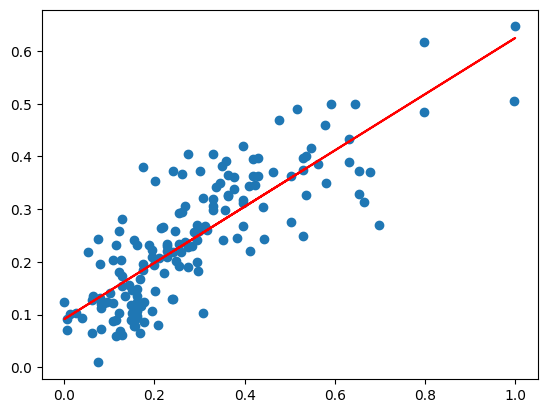

In [ ]:
plt.scatter(y_test, prediction)
plt.plot(y_test, m*y_test + b, color="red")

The code `plt.scatter(y_test, prediction)` creates a scatter plot of the actual values of the target variable (`y_test`) against the predicted values of the target variable (`prediction`).

The code `plt.plot(y_test, m*y_test + b, color="red")` plots the fitted linear regression model on the scatter plot. The `m` and `b` variables are the slope and y-intercept of the fitted model, respectively. The `color="red"` argument sets the color of the line to red.

Plotting the fitted linear regression model on the scatter plot can be helpful for visualizing the relationship between the actual and predicted values of the target variable, as well as for evaluating the performance of the model.

Here is a brief explanation of how to interpret the plot:

* If the red line passes through the middle of the scatter plot, then the model is making accurate predictions.
* If the red line is above the scatter plot, then the model is overestimating the target variable.
* If the red line is below the scatter plot, then the model is underestimating the target variable.

The plot can also be used to identify any outliers in the data. Outliers are points that are far away from the fitted model. Outliers can be caused by errors in the data collection or measurement process, or they can be genuine observations that are outside of the normal range.

If there are any outliers in the data, they will be visible as points that are far away from the red line. Outliers can affect the performance of the model, so it is important to identify and address them.

Plotting the fitted linear regression model on the scatter plot can be a useful tool for evaluating the performance of the model and for identifying any areas where the model can be improved.